## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
# Machine Learning
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
# Deep Learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


## Import dataset

### Train data

In [14]:
data = pd.read_csv("./data.csv")
data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,remaining_useful_cycles
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [15]:
data.shape

(20631, 14)

### Test data

In [16]:
test_data = pd.read_csv(r"cmapss\CMaps\test_FD001.txt", sep = "\s+", header = None)
test_data.columns = column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]
test_data.head()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


- Selecting only those columns from the test data, which is present in the train data, except from RUL

In [17]:
test_column_names = [col for col in data.columns if col != "remaining_useful_cycles"]
len(test_column_names)

13

In [18]:
test_data = test_data[test_column_names]

In [19]:
test_data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130


In [20]:
test_data.shape

(13096, 13)

In [21]:
test_grp = test_data.groupby("engine")

### RUL data

In [22]:
rul_data = pd.read_csv("cmapss\CMaps\RUL_FD001.txt", sep = "\s+", header = None)
rul_data = rul_data.rename(columns={
    0: "RUL"
})
rul_data.head()


,RUL
0,112
1,98
2,69
3,82
4,91


In [23]:
rul_data.shape

(100, 1)

## Visualization

In [24]:
data_grp = data.groupby("engine")

### Sensor2 data vs RUL

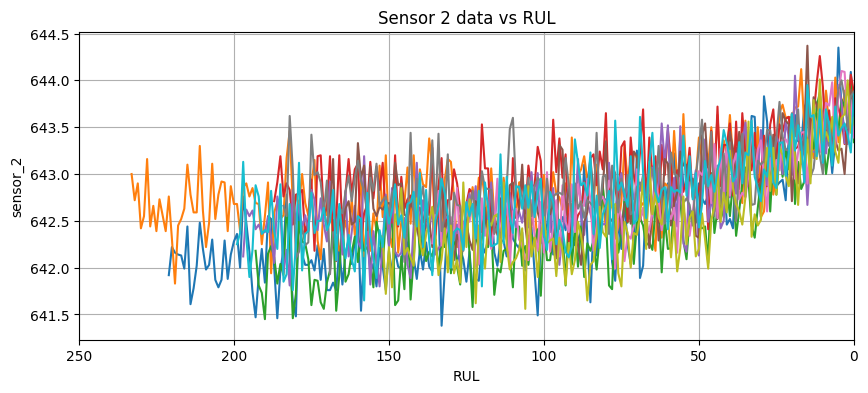

In [25]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor2"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_2")
plt.title("Sensor 2 data vs RUL");

### Sensor3 data vs RUL

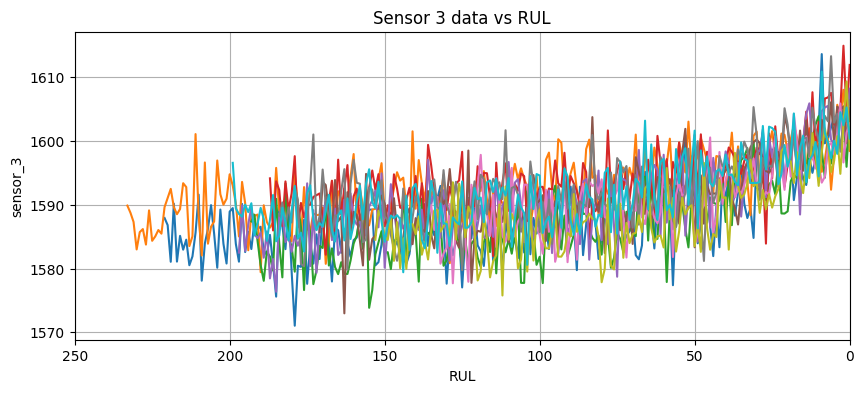

In [82]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor3"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_3")
plt.title("Sensor 3 data vs RUL");

### Sensor4 vs RUL

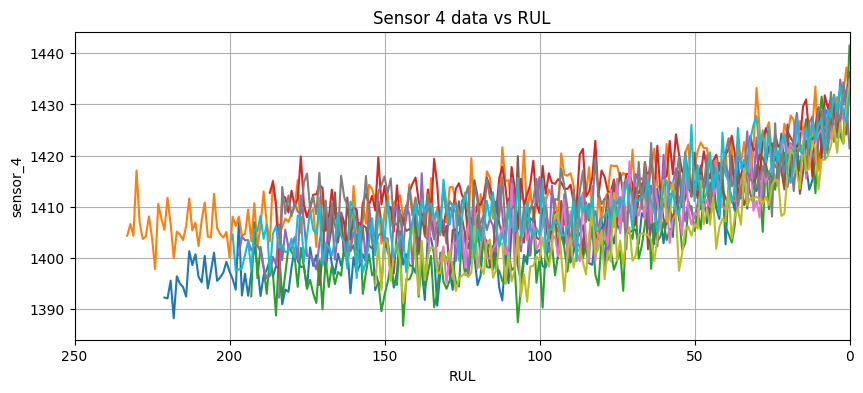

In [83]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor4"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_4")
plt.title("Sensor 4 data vs RUL");

### Sensor7 vs RUL

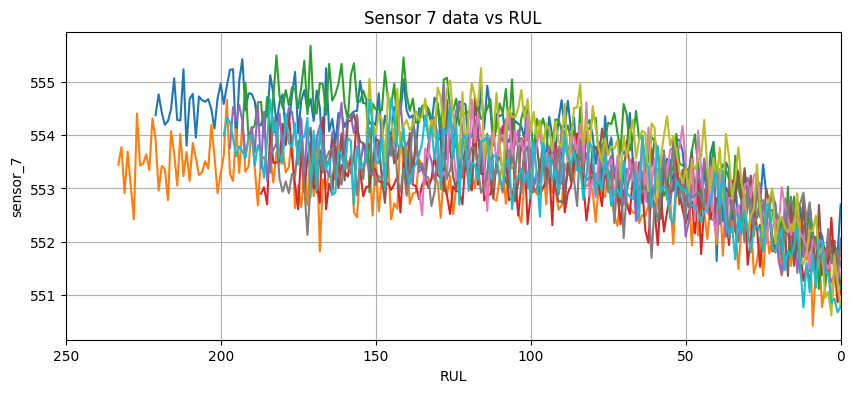

In [84]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor7"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_7")
plt.title("Sensor 7 data vs RUL");

#### **🔑Observation: For each sensor, the RUL is kind of constant before 125 to 150, then the value changes**
#### So, let's clip the max RUL value as `125` (you may experiment with other values as well)

## Data Preprocessing

- Clipping each RUL to 125, that is > 125

In [26]:
data["RUL"] = data["remaining_useful_cycles"].clip(upper=125)
data.drop(columns = ["engine", "remaining_useful_cycles"], inplace = True)

data.head()

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,125
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125


- Data preparation
- The test set contains some cycles for each engine, but for the experiment, only the last cycle for each engine is required, as we are going to predict the RUL, w.r.t the latest cycle for each engine

In [27]:
X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]

X_test = test_grp.last().reset_index().drop(['engine'], axis=1)  # Taking only the last cycle data for each engine
y_test = rul_data.to_numpy().ravel()

In [28]:
X_train.head()

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [29]:
X_test.head(1)

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,642.58,1581.22,1398.91,554.42,2388.08,47.23,521.79,2388.06,8.4024,393,38.81,23.3552


- Min Max Normalization

In [30]:
scaler = MinMaxScaler()

In [31]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(f"X_train shape: {X_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20631, 12)
y_train shape: (20631,)
X_test shape: (100, 12)
y_test shape: (100,)


## Modelling

### **Machine Learning**

- Function to evaluate model performance

In [2]:
def model_performance(y_true, y_pred):
    return {
        "mae": np.round(mae(y_true, y_pred), 3),
        "mse": np.round(mse(y_true, y_pred), 3),
        "rmse": np.round(mse(y_true, y_pred) ** 0.5, 3),
        "r2_score": np.round(r2_score(y_true, y_pred), 3)
    }

### 1. Linear Regression

In [34]:
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_scaled, y_train)

LinearRegression(n_jobs=-1)

In [35]:
pred = lin_reg.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 18.485, 'mse': 516.842, 'rmse': 22.734, 'r2_score': 0.702}

In [36]:
y_pred = lin_reg.predict(X_test_scaled)
lin_reg_model_performance = model_performance(y_test, y_pred)
lin_reg_model_performance

{'mae': 18.249, 'mse': 525.064, 'rmse': 22.914, 'r2_score': 0.696}

### 2. Random Forest

In [64]:
rdf = RandomForestRegressor(n_estimators=150, n_jobs = -1, max_depth = 7, random_state = 0)
rdf.fit(X_scaled, y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, n_jobs=-1, random_state=0)

In [65]:
pred = rdf.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 15.816, 'mse': 413.665, 'rmse': 20.339, 'r2_score': 0.762}

In [66]:
y_pred = rdf.predict(X_test_scaled)
rdf_model_performance = model_performance(y_test, y_pred)
rdf_model_performance

{'mae': 15.628, 'mse': 416.567, 'rmse': 20.41, 'r2_score': 0.759}

### 3. XGBoost

In [67]:
xgb = XGBRegressor(n_jobs = -1, random_state = 0)
xgb.fit(X_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [68]:
pred = xgb.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 10.949, 'mse': 220.263, 'rmse': 14.841, 'r2_score': 0.873}

In [69]:
y_pred = xgb.predict(X_test_scaled)
xgb_model_performance = model_performance(y_test, y_pred)
xgb_model_performance

{'mae': 15.049, 'mse': 397.521, 'rmse': 19.938, 'r2_score': 0.77}

### 4. LightGBM

In [70]:
lgbm = LGBMRegressor(n_jobs = -1, random_state = 0)
lgbm.fit(X_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 20631, number of used features: 12
[LightGBM] [Info] Start training from score 86.829286


LGBMRegressor(n_jobs=-1, random_state=0)

In [71]:
pred = lgbm.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 13.765, 'mse': 330.299, 'rmse': 18.174, 'r2_score': 0.81}

In [72]:
y_pred = lgbm.predict(X_test_scaled)
lgbm_model_performance = model_performance(y_test, y_pred)
lgbm_model_performance

{'mae': 14.842, 'mse': 381.274, 'rmse': 19.526, 'r2_score': 0.779}

### 5. CatBoost

In [73]:
ctb = CatBoostRegressor()
ctb.fit(X_scaled, y_train)

Learning rate set to 0.06605
0:	learn: 39.8486751	total: 160ms	remaining: 2m 39s
1:	learn: 38.1799885	total: 166ms	remaining: 1m 22s
2:	learn: 36.6347334	total: 173ms	remaining: 57.6s
3:	learn: 35.2079496	total: 179ms	remaining: 44.5s
4:	learn: 33.8937761	total: 184ms	remaining: 36.6s
5:	learn: 32.7007794	total: 190ms	remaining: 31.5s
6:	learn: 31.6174161	total: 196ms	remaining: 27.8s
7:	learn: 30.6149299	total: 201ms	remaining: 24.9s
8:	learn: 29.7033344	total: 208ms	remaining: 22.9s
9:	learn: 28.8779557	total: 213ms	remaining: 21.1s
10:	learn: 28.1311194	total: 219ms	remaining: 19.7s
11:	learn: 27.4539560	total: 227ms	remaining: 18.7s
12:	learn: 26.8408588	total: 233ms	remaining: 17.7s
13:	learn: 26.2896256	total: 240ms	remaining: 16.9s
14:	learn: 25.7856689	total: 247ms	remaining: 16.2s
15:	learn: 25.3296450	total: 255ms	remaining: 15.7s
16:	learn: 24.9288066	total: 261ms	remaining: 15.1s
17:	learn: 24.5551794	total: 267ms	remaining: 14.5s
18:	learn: 24.2151922	total: 273ms	remainin

In [74]:
pred = ctb.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 12.915, 'mse': 294.289, 'rmse': 17.155, 'r2_score': 0.831}

In [75]:
y_pred = ctb.predict(X_test_scaled)
ctb_model_performance = model_performance(y_test, y_pred)
ctb_model_performance

{'mae': 14.759, 'mse': 386.822, 'rmse': 19.668, 'r2_score': 0.776}

## Comparison

- Creating a dataframe using the model performances

In [76]:
comparison_df = pd.DataFrame({
    "model": ["linear_regression", "random_forest", "xgboost", "lightgbm", "catboost"],
    "mae": [lin_reg_model_performance["mae"]] + [rdf_model_performance["mae"]] + [xgb_model_performance["mae"]] + [lgbm_model_performance["mae"]] + [ctb_model_performance["mae"]],
    "mse": [lin_reg_model_performance["mse"]] + [rdf_model_performance["mse"]] + [xgb_model_performance["mse"]] + [lgbm_model_performance["mse"]] + [ctb_model_performance["mse"]],
    "rmse": [lin_reg_model_performance["rmse"]] + [rdf_model_performance["rmse"]] + [xgb_model_performance["rmse"]] + [lgbm_model_performance["rmse"]] + [ctb_model_performance["rmse"]],
    "r2_score": [lin_reg_model_performance["r2_score"]] + [rdf_model_performance["r2_score"]] + [xgb_model_performance["r2_score"]] + [lgbm_model_performance["r2_score"]] + [ctb_model_performance["r2_score"]],
})

In [77]:
comparison_df.set_index("model", inplace = True)
comparison_df

,mae,mse,rmse,r2_score
model,,,,
linear_regression,18.249,525.064,22.914,0.696
random_forest,15.628,416.567,20.410,0.759
xgboost,15.049,397.521,19.938,0.770
lightgbm,14.842,381.274,19.526,0.779
catboost,14.759,386.822,19.668,0.776


- Sort the dataframe in descending order, w.r.t `RMSE`

In [78]:
comparison_df.sort_values(by = "rmse").style.background_gradient()

,mae,mse,rmse,r2_score
model,,,,
lightgbm,14.842000,381.274000,19.526000,0.779000
catboost,14.759000,386.822000,19.668000,0.776000
xgboost,15.049000,397.521000,19.938000,0.770000
random_forest,15.628000,416.567000,20.410000,0.759000
linear_regression,18.249000,525.064000,22.914000,0.696000


### Up to this, clearly, `LightGBM` is the winner

In [114]:
y_pred = lgbm.predict(X_test_scaled)

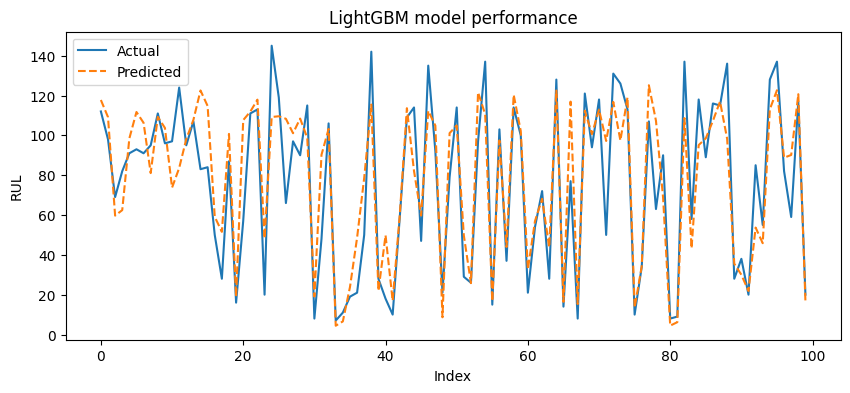

In [116]:
plt.figure(figsize = (10, 4))
# plt.grid(True)
sns.lineplot(y_test, label = "Actual")
sns.lineplot(y_pred, linestyle = "--", label = "Predicted");
plt.xlabel("Index")
plt.ylabel("RUL")
plt.title("LightGBM model performance");

### **Deep Learning**

- Model Checkpoint callback (To save the best version of the model through the epochs)

In [23]:
def model_ckpt(model_name:str):
    return ModelCheckpoint(
        filepath = f"./saved_models/{model_name}.keras",
        monitor = "val_loss",
        save_best_only = True,
        verbose = 1
    )

- Reduce learning rate on Plateau callback (Reduces the learning rate, when a particular metric (e.g, validation loss) has stopped improving)

In [25]:
reduce_lr_on_plateau = ReduceLROnPlateau(
    monitor = "val_loss",
    patience = 2,
    factor = 0.01,
    min_lr = 0.00001
)

- Function to plot the model performance through the epochs

In [3]:
def plot_model_performance(history_obj):
    plt.figure(figsize = (10, 4))
    
    plt.suptitle("Model performance")
    plt.subplot(1, 2, 1)
    sns.lineplot(x = history_obj.epoch, y = history_obj.history["mae"], label = "Train loss (MAE)")
    sns.lineplot(x = history_obj.epoch, y = history_obj.history["val_mae"], label = "Test loss (MAE)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MAE)")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.lineplot(x = history_obj.epoch, y = history_obj.history["mse"], label = "Train loss (MSE)")
    sns.lineplot(x = history_obj.epoch, y = history_obj.history["val_mse"], label = "Test loss (MSE)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

### 1. ANN

In [332]:
inputs = layers.Input(shape = (12,))
x = layers.Dense(units = 64, activation = 'relu')(inputs)
x = layers.Dense(units = 64, activation = 'relu')(x)
x = layers.Dense(units = 64, activation = 'relu')(x)
x = layers.Dense(units = 128, activation = 'relu')(x)
outputs = layers.Dense(units = 1, activation = 'relu')(x)

In [333]:
ann_model = Model(inputs, outputs)

In [334]:
ann_model.compile(
    loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0015),
    metrics = ['mae', 'mse']
)

In [335]:
ann_model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 12)]              0         
                                                                 
 dense_116 (Dense)           (None, 64)                832       
                                                                 
 dense_117 (Dense)           (None, 64)                4160      
                                                                 
 dense_118 (Dense)           (None, 64)                4160      
                                                                 
 dense_119 (Dense)           (None, 128)               8320      
                                                                 
 dense_120 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17601 (68.75 KB)
Trainable params: 17601 (68

In [336]:
ann_history = ann_model.fit(x = X_scaled, y = y_train, validation_data = (X_test_scaled, y_test),batch_size = 32, epochs=100, callbacks = [model_ckpt("ann")])

Epoch 1/100
625/645 [============================>.] - ETA: 0s - loss: 1028.3097 - mae: 22.9759 - mse: 1028.3097
Epoch 1: val_loss improved from inf to 536.47766, saving model to ./saved_models\ann_2.keras
645/645 [==============================] - 1s 1ms/step - loss: 1011.0538 - mae: 22.7687 - mse: 1011.0538 - val_loss: 536.4777 - val_mae: 17.4220 - val_mse: 536.4777
Epoch 2/100
599/645 [==========================>...] - ETA: 0s - loss: 467.8180 - mae: 16.6215 - mse: 467.8180
Epoch 2: val_loss improved from 536.47766 to 513.76971, saving model to ./saved_models\ann_2.keras
645/645 [==============================] - 1s 1ms/step - loss: 468.7010 - mae: 16.6748 - mse: 468.7010 - val_loss: 513.7697 - val_mae: 17.0273 - val_mse: 513.7697
Epoch 3/100
639/645 [============================>.] - ETA: 0s - loss: 456.8653 - mae: 16.4227 - mse: 456.8653
Epoch 3: val_loss did not improve from 513.76971
645/645 [==============================] - 1s 994us/step - loss: 456.9356 - mae: 16.4167 - mse: 

- Plot model performance

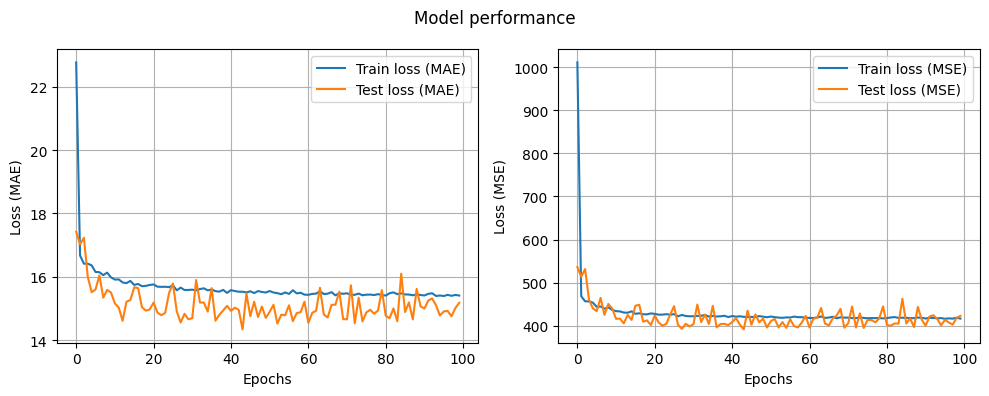

In [337]:
plot_model_performance(ann_history)

- Load the best performing version of the model

In [79]:
loaded_ann_model = tf.keras.models.load_model("./saved_models/ann.keras");

- Get prediction

In [80]:
ann_pred = loaded_ann_model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [82]:
ann_pred.shape

(100, 1)

- Get model performance

In [83]:
ann_performance = model_performance(y_test, ann_pred)
ann_performance

{'mae': 14.707, 'mse': 386.53, 'rmse': 19.66, 'r2_score': 0.776}

- Adding the ann performance in the performance df for comparison

In [84]:
ann_df = pd.DataFrame({
    "model": ["ann"],
    "mae": [ann_performance["mae"]],
    "mse": [ann_performance["mse"]],
    "rmse": [ann_performance["rmse"]],
    "r2_score": [ann_performance["r2_score"]]
})

ann_df = ann_df.set_index("model")

comparison_df = pd.concat([comparison_df, ann_df])

In [85]:
comparison_df.sort_values("rmse")

,mae,mse,rmse,r2_score
model,,,,
lightgbm,14.842,381.274,19.526,0.779
ann,14.707,386.530,19.660,0.776
catboost,14.759,386.822,19.668,0.776
xgboost,15.049,397.521,19.938,0.770
random_forest,15.628,416.567,20.410,0.759
linear_regression,18.249,525.064,22.914,0.696


- `Very close to beat the best performing model (LightGBM)`

### 2. LSTM

#### **Preparing the data**
- The main challenge for any Deep Learning Model is to create the data in such a way, that is expected by the model.
- The above model takes input 2D data, including the batch size.
- LSTM requires the data in 3D shape, including the batch size.
- For the above models, we have used a single cycle as a input, and the corresponding label for that cycle as the output.
- But, for LSTM, we need 2D data (excluding the batch size), thus, we can't proceed with a single cycle.
- So, we have to use, so called, **WINDOWED DATA**.
- The windowed data for this problem will be nothing but a set of contiguous engine cycle data, for a particular engine.
- And what about the input?. Well, it is nothing but the RUL of the next cycle.

So, for a particular engine :- 

`engine` | `sensor_1` | .... | `sensor_n` | `RUL`

   `1`   |   `0.18`   | .... |   `0.72`  | `191`

   `2`   |   `0.28`   | .... |   `0.73`  | `190`

   `3`   |   `0.45`   | .... |   `0.74`  | `189`

   `4`   |   `0.88`   | .... |   `0.75`  | `188`

   `5`   |   `0.89`   | .... |   `0.76`  | `187`

   `6`   |   `0.28`   | .... |   `0.73`  | `186`
   
Then, 
if WINDOW_SIZE = 5,

feature will be (1st 5 cycles):-

`engine` | `sensor_1` | .... | `sensor_n` | `RUL`

   `1`   |   `0.18`   | .... |   `0.72`  | `191`

   `2`   |   `0.28`   | .... |   `0.73`  | `190`

   `3`   |   `0.45`   | .... |   `0.74`  | `189`

   `4`   |   `0.88`   | .... |   `0.75`  | `188`

   `5`   |   `0.89`   | .... |   `0.76`  | `187`

And label :- `186`



##### **Train data**

In [4]:
data = pd.read_csv("./data.csv")
data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,remaining_useful_cycles
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


- Clip RUL to 125

In [5]:
data["RUL"] = data["remaining_useful_cycles"].clip(upper=125)
data.drop(columns = ["remaining_useful_cycles"], inplace = True)
data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,125
1,1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
2,1,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
3,1,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
4,1,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125


- Normalizing the sensor values 

In [6]:
scaler = MinMaxScaler()
data.iloc[:, 1:-1] = scaler.fit_transform(data.iloc[:, 1:-1])

- Creating a group by object based on `engine` number, so  that, we can efficiently access each engine data

In [7]:
data_grp = data.groupby("engine")

- Function to get windowed data

- It is to be carefully noted that, we have taken `WINDOW_SIZE` as `30`.
- This is because, the lowest amount of data, that is present in the test set is `31`, for `engine1`.

- See the below output!

In [10]:
def get_windowed_data(data, WINDOW_SIZE = 30):
    X = data.to_numpy()[:, 1:-1]    # Not taking the engine no. as the feature
    y = data.to_numpy()[:, -1]

    X_window = []
    y_window = []

    for i in range(0, X.shape[0] - WINDOW_SIZE):
        X_window.append(X[i: i + WINDOW_SIZE])
        y_window.append(y[i + WINDOW_SIZE])
    
    return np.array(X_window), np.array(y_window)


- Train data preparation

In [11]:
feature, label = get_windowed_data(data_grp.get_group(1))   # 1st engine windowed data

for engine_no, engine_data in tqdm(data_grp):
    if(engine_no == 1):   # As it is already taken
        continue
    x, y = get_windowed_data(engine_data)
    feature = np.vstack([feature, x])
    label = np.hstack([label, y])

  0%|          | 0/100 [00:00<?, ?it/s]

##### **Test data**

- For the test data, we have only 1 RUL per engine in the RUL_data file.
- So, taking only the last window (last 30 cycles) per engine

- Test data preparation

In [12]:
test_data = pd.read_csv(r"cmapss\CMaps\test_FD001.txt", sep = "\s+", header = None)

test_data.columns = column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]

test_column_names = [col for col in data.columns if col != "RUL"]

test_data = test_data[test_column_names]

print(test_data.shape)
test_data.head()


(13096, 13)


,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130


In [13]:
test_data.iloc[:, 1:] = scaler.transform(test_data.iloc[:, 1:])
test_data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,1,0.545181,0.310661,0.269413,0.652174,0.212121,0.208333,0.646055,0.220588,0.308965,0.333333,0.558140,0.661834
1,1,0.150602,0.379551,0.222316,0.805153,0.166667,0.386905,0.739872,0.264706,0.213159,0.416667,0.682171,0.686827
2,1,0.376506,0.346632,0.322248,0.685990,0.227273,0.386905,0.699360,0.220588,0.458638,0.416667,0.728682,0.721348
3,1,0.370482,0.285154,0.408001,0.679549,0.196970,0.255952,0.573561,0.250000,0.257022,0.250000,0.666667,0.662110
4,1,0.391566,0.352082,0.332039,0.694042,0.166667,0.273810,0.737740,0.220588,0.300885,0.166667,0.658915,0.716377


In [14]:
test_data_grp = test_data.groupby("engine")

In [15]:
def get_last_window_test_data(data, WINDOW_SIZE = 30):
    X_test = data.to_numpy()[-WINDOW_SIZE:, 1:]
    return np.array(np.expand_dims(X_test, axis = 0))

In [16]:
X_test = get_last_window_test_data(test_data_grp.get_group(1))   # 1st engine windowed data

for engine_no, engine_data in tqdm(test_data_grp):
    if(engine_no == 1):   # As it is already taken
        continue
    x = get_last_window_test_data(engine_data)
    X_test = np.vstack([X_test, x])

  0%|          | 0/100 [00:00<?, ?it/s]

##### **RUL data**

In [17]:
rul_data = pd.read_csv("cmapss\CMaps\RUL_FD001.txt", sep = "\s+", header = None)
rul_data = rul_data.rename(columns={
    0: "RUL"
})
y_test = rul_data.to_numpy().ravel()

print(y_test.shape)
print(y_test[:5])


(100,)
[112  98  69  82  91]


- Model architecture

In [26]:
inputs = layers.Input(shape = (30, 12))
x = layers.LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.2, activation = "tanh")(inputs)
x = layers.LSTM(units = 128, activation = "relu")(x)
x = layers.Dense(units = 64, activation = "relu")(x)
outputs = layers.Dense(units = 1, activation = "relu")(x)

In [27]:
lstm_model = Model(inputs, outputs)

In [28]:
lstm_model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0015),
    metrics = ["mae", "mse"]
)

In [29]:
lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 12)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           72192     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 212097 (828.50 KB)
Trainable params: 212097 (828.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
lstm_history = lstm_model.fit(x = feature, y = label, validation_data = (X_test, y_test), batch_size = 32, epochs = 25, callbacks = [model_ckpt("lstm_model_new"), reduce_lr_on_plateau])

Epoch 1/25


550/551 [============================>.] - ETA: 0s - loss: 945.5596 - mae: 23.9573 - mse: 945.5596
Epoch 1: val_loss improved from inf to 593.04651, saving model to ./saved_models\lstm_model_new.keras
551/551 [==============================] - 29s 43ms/step - loss: 945.2059 - mae: 23.9544 - mse: 945.2059 - val_loss: 593.0465 - val_mae: 18.3666 - val_mse: 593.0465 - lr: 0.0015
Epoch 2/25
550/551 [============================>.] - ETA: 0s - loss: 442.1049 - mae: 16.4319 - mse: 442.1049
Epoch 2: val_loss improved from 593.04651 to 370.66150, saving model to ./saved_models\lstm_model_new.keras
551/551 [==============================] - 23s 42ms/step - loss: 442.4841 - mae: 16.4349 - mse: 442.4841 - val_loss: 370.6615 - val_mae: 14.6522 - val_mse: 370.6615 - lr: 0.0015
Epoch 3/25
551/551 [==============================] - ETA: 0s - loss: 300.0393 - mae: 13.3472 - mse: 300.0393
Epoch 3: val_loss improved from 370.66150 to 264.19681, saving model to ./saved_models\lstm_model_new.

- Plot model performance

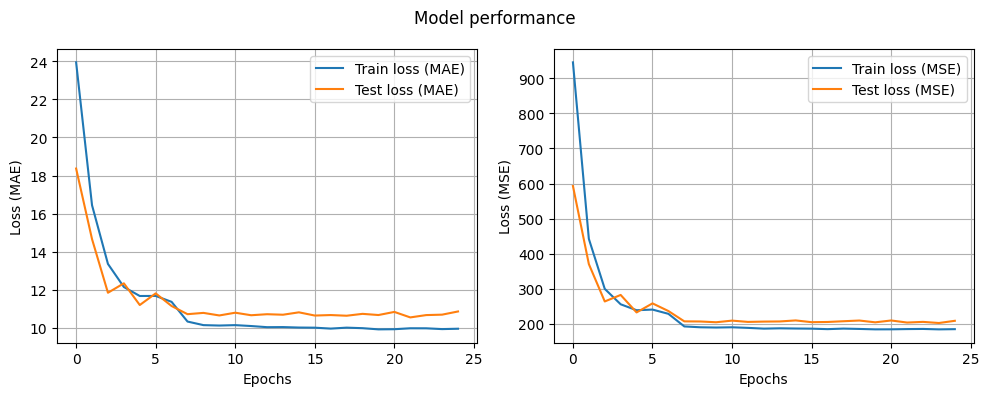

In [31]:
plot_model_performance(lstm_history)

- Load the best version of the LSTM model

In [32]:
loaded_lstm_model = tf.keras.models.load_model("./saved_models/lstm_model_new.keras")

- Get prediction

In [33]:
lstm_pred = loaded_lstm_model.predict(X_test)

4/4 [==============================] - 0s 7ms/step


- Get model performance

In [34]:
lstm_performance = model_performance(y_test, lstm_pred)
lstm_performance

{'mae': 10.678, 'mse': 202.804, 'rmse': 14.241, 'r2_score': 0.883}

- **Yesss, we have found the best model so far 🔥, it is none other than `LSTM`!**

- Creating the comparison dataframe

In [35]:
lstm_df = pd.DataFrame({
    "model": ["lstm"],
    "mae": [lstm_performance["mae"]],
    "mse": [lstm_performance["mse"]],
    "rmse": [lstm_performance["rmse"]],
    "r2_score": [lstm_performance["r2_score"]]
})

lstm_df = lstm_df.set_index("model")

comparison_df = lstm_df

- Sort the df based on `RMSE`

In [36]:
comparison_df.sort_values("rmse")

,mae,mse,rmse,r2_score
model,,,,
lstm,10.678,202.804,14.241,0.883


- Save the dataframe into a `.csv` file, so that we don't have to get the model performance for each models every time!

In [37]:
comparison_df.to_csv("comparison_df_new.csv")

### 3. CNN (Conv1D)

- Conv1D is faster than LSTM, it is also used so much for the sequential data processing, i.e, the data, where order matters!

- Model architecture

In [38]:
inputs = layers.Input(shape = (30, 12))
x = layers.Conv1D(filters = 128, kernel_size = 24, activation = "relu", padding = "causal", strides = 1)(inputs)
x = layers.Conv1D(filters = 64, kernel_size = 16, activation = "relu", padding = "valid", strides = 1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units = 1, activation = "relu")(x)

In [39]:
cnn_model = Model(inputs, outputs)

In [40]:
cnn_model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["mae", "mse"]
)

In [41]:
cnn_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 12)]          0         
                                                                 
 conv1d (Conv1D)             (None, 30, 128)           36992     
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            131136    
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 961       
                                                                 
Total params: 169089 (660.50 KB)
Trainable params: 169089 (660.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
cnn_history = cnn_model.fit(x = feature, y = label, validation_data = (X_test, y_test), batch_size = 32, epochs = 25, callbacks = [model_ckpt("cnn_model_new"), reduce_lr_on_plateau])

Epoch 1/25
551/551 [==============================] - ETA: 0s - loss: 822.0062 - mae: 22.3524 - mse: 822.0062
Epoch 1: val_loss improved from inf to 471.43039, saving model to ./saved_models\cnn_model_new.keras
551/551 [==============================] - 4s 6ms/step - loss: 822.0062 - mae: 22.3524 - mse: 822.0062 - val_loss: 471.4304 - val_mae: 16.8043 - val_mse: 471.4304 - lr: 0.0010
Epoch 2/25
548/551 [============================>.] - ETA: 0s - loss: 323.9221 - mae: 14.2008 - mse: 323.9221
Epoch 2: val_loss improved from 471.43039 to 264.69485, saving model to ./saved_models\cnn_model_new.keras
551/551 [==============================] - 3s 6ms/step - loss: 323.7573 - mae: 14.1949 - mse: 323.7573 - val_loss: 264.6949 - val_mae: 12.3414 - val_mse: 264.6949 - lr: 0.0010
Epoch 3/25
551/551 [==============================] - ETA: 0s - loss: 256.8893 - mae: 12.4120 - mse: 256.8893
Epoch 3: val_loss improved from 264.69485 to 246.31654, saving model to ./saved_models\cnn_model_new.keras
551

- Plot model performance

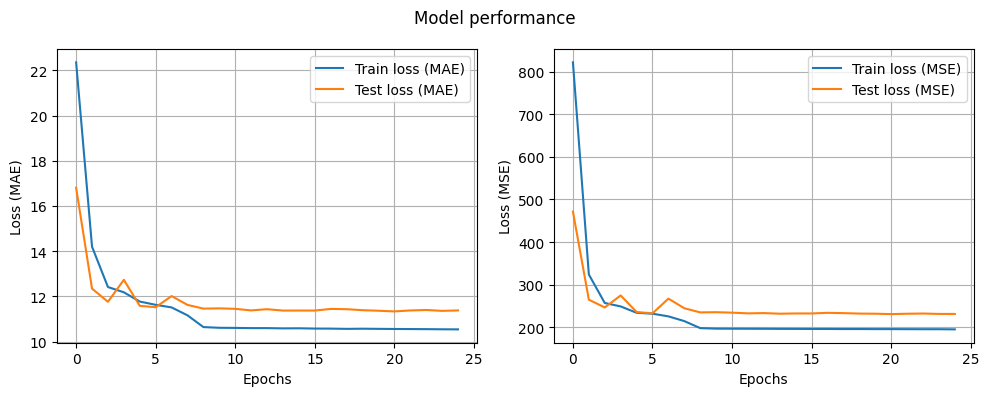

In [43]:
plot_model_performance(cnn_history)

- Load the best performing version of the CNN model

In [44]:
loaded_cnn_model = tf.keras.models.load_model("./saved_models/cnn_model_new.keras")

- Get prediction

In [45]:
cnn_pred = loaded_cnn_model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


- Get model performance

In [46]:
cnn_performance = model_performance(y_test, cnn_pred)
cnn_performance

{'mae': 11.334, 'mse': 230.779, 'rmse': 15.191, 'r2_score': 0.866}

- Update the comparison df

In [52]:
cnn_df = pd.DataFrame({
    "model": ["cnn"],
    "mae": [cnn_performance["mae"]],
    "mse": [cnn_performance["mse"]],
    "rmse": [cnn_performance["rmse"]],
    "r2_score": [cnn_performance["r2_score"]]
})

cnn_df = cnn_df.set_index("model")

comparison_df = pd.concat([comparison_df, cnn_df])

In [53]:
comparison_df.sort_values("rmse")

,mae,mse,rmse,r2_score
model,,,,
lstm,10.678,202.804,14.241,0.883
cnn,11.334,230.779,15.191,0.866


- Save the comparison df

In [54]:
comparison_df.to_csv("comparison_df_new.csv")

### 3. CNN (Conv2D)

In [55]:
feature_cnn = np.expand_dims(feature, axis = -1)
X_test_cnn = np.expand_dims(X_test, axis = -1)

In [56]:
feature_cnn.shape, X_test_cnn.shape

((17631, 30, 12, 1), (100, 30, 12, 1))

- Model architecture

In [57]:
inputs = layers.Input(shape = (30, 12, 1))
x = layers.Conv2D(filters = 64, strides = (1, 1), kernel_size = (3, 3), activation = "relu", padding = "same")(inputs)
x = layers.Conv2D(filters = 48, strides = (1, 1), kernel_size = (3, 3), activation = "relu", padding = "valid")(x)
x = layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1))(x)
x = layers.Conv2D(filters = 32, strides = (1, 1), kernel_size = (3, 3), activation = "relu", padding = "valid")(x)
x = layers.Flatten()(x)
x = layers.Dropout(rate = 0.3)(x)
x = layers.Dense(units = 128, activation = "relu")(x)
outputs = layers.Dense(units = 1, activation = "relu")(x)

In [58]:
cnn_2d_model = Model(inputs, outputs)

In [59]:
cnn_2d_model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["mae", "mse"]
)

In [60]:
cnn_2d_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 12, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 12, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 10, 48)        27696     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 8, 48)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 6, 32)         13856     
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                           

In [61]:
cnn_2d_history = cnn_2d_model.fit(x = feature_cnn, y = label, validation_data = (X_test_cnn, y_test), batch_size = 32, epochs = 25, callbacks = [model_ckpt("cnn_2d_model_new"), reduce_lr_on_plateau])

Epoch 1/25
551/551 [==============================] - ETA: 0s - loss: 924.8554 - mae: 23.7593 - mse: 924.8554
Epoch 1: val_loss improved from inf to 440.61868, saving model to ./saved_models\cnn_2d_model_new.keras
551/551 [==============================] - 8s 13ms/step - loss: 924.8554 - mae: 23.7593 - mse: 924.8554 - val_loss: 440.6187 - val_mae: 15.4812 - val_mse: 440.6187 - lr: 0.0010
Epoch 2/25
551/551 [==============================] - ETA: 0s - loss: 399.5367 - mae: 15.8518 - mse: 399.5367
Epoch 2: val_loss improved from 440.61868 to 337.45352, saving model to ./saved_models\cnn_2d_model_new.keras
551/551 [==============================] - 7s 13ms/step - loss: 399.5367 - mae: 15.8518 - mse: 399.5367 - val_loss: 337.4535 - val_mae: 14.3281 - val_mse: 337.4535 - lr: 0.0010
Epoch 3/25
549/551 [============================>.] - ETA: 0s - loss: 319.4616 - mae: 14.0538 - mse: 319.4616
Epoch 3: val_loss improved from 337.45352 to 268.96429, saving model to ./saved_models\cnn_2d_model_ne

- Plot model performance

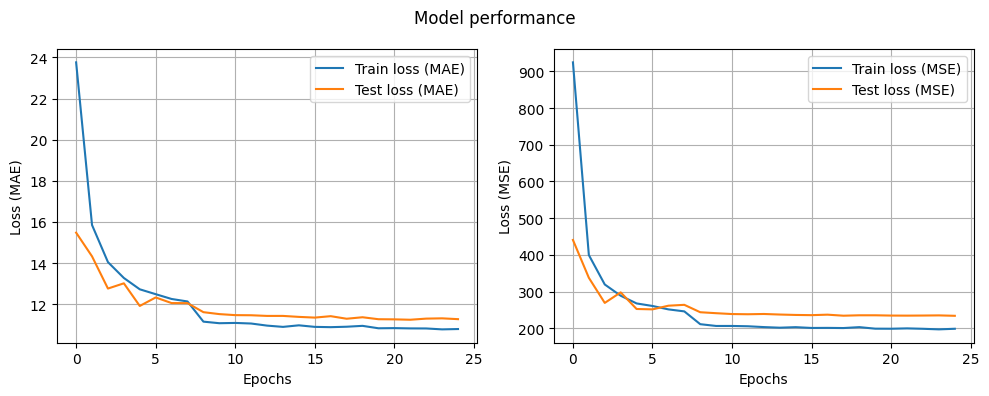

In [62]:
plot_model_performance(cnn_2d_history)

- Load the best version of the CNN_2D model

In [63]:
loaded_cnn_2d_model = tf.keras.models.load_model("./saved_models/cnn_2d_model_new.keras")

- Get prediction and model performance

In [64]:
cnn_2d_pred = loaded_cnn_2d_model.predict(X_test_cnn)
cnn_2d_performance = model_performance(y_test, cnn_2d_pred)
cnn_2d_performance

4/4 [==============================] - 0s 3ms/step


{'mae': 11.276, 'mse': 233.779, 'rmse': 15.29, 'r2_score': 0.865}

In [65]:
cnn_2d_df = pd.DataFrame({
    "model": ["cnn_2d"],
    "mae": [cnn_2d_performance["mae"]],
    "mse": [cnn_2d_performance["mse"]],
    "rmse": [cnn_2d_performance["rmse"]],
    "r2_score": [cnn_2d_performance["r2_score"]]
})
cnn_2d_df.set_index("model", inplace = True)
comparison_df = pd.read_csv("./comparison_df_new.csv", index_col = "model")
comparison_df = pd.concat([comparison_df, cnn_2d_df])

In [66]:
comparison_df

,mae,mse,rmse,r2_score
model,,,,
lstm,10.678,202.804,14.241,0.883
cnn,11.334,230.779,15.191,0.866
cnn_2d,11.276,233.779,15.290,0.865


In [67]:
comparison_df.to_csv("./comparison_df_new.csv")

- Sort the df w.r.t `RMSE`

In [68]:
comparison_df.sort_values("rmse")

,mae,mse,rmse,r2_score
model,,,,
lstm,10.678,202.804,14.241,0.883
cnn,11.334,230.779,15.191,0.866
cnn_2d,11.276,233.779,15.290,0.865


### 5. Bi-LSTM

In [146]:
inputs = layers.Input(shape = (30, 12))
x = layers.Bidirectional(layers.LSTM(units = 64, recurrent_dropout = 0.3, return_sequences = True, activation = "relu"))(inputs)
x = layers.Bidirectional(layers.LSTM(units = 128, recurrent_dropout = 0.3, activation = "relu"))(x)
x = layers.Dense(units = 128, activation = "relu")(x)
outputs = layers.Dense(units = 1, activation = "relu")(x)

In [147]:
bi_lstm_model = Model(inputs, outputs)

In [148]:
bi_lstm_model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
    metrics = ["mae", "mse"]
)

In [149]:
bi_lstm_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 30, 12)]          0         
                                                                 
 bidirectional_28 (Bidirect  (None, 30, 128)           39424     
 ional)                                                          
                                                                 
 bidirectional_29 (Bidirect  (None, 256)               263168    
 ional)                                                          
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 335617 (1.28 MB)
Trainable params: 335617 (1

In [150]:
bi_lstm_history = bi_lstm_model.fit(x = feature, y = label, validation_data = (X_test, y_test), batch_size = 32, epochs = 25, callbacks = [model_ckpt("bi_lstm_new_2"), reduce_lr_on_plateau])

Epoch 1/25
550/551 [============================>.] - ETA: 0s - loss: 2358.7063 - mae: 33.5300 - mse: 2358.7063
Epoch 1: val_loss improved from inf to 689.70264, saving model to ./saved_models\bi_lstm_new_2.keras
551/551 [==============================] - 38s 55ms/step - loss: 2355.5867 - mae: 33.5082 - mse: 2355.5867 - val_loss: 689.7026 - val_mae: 20.1355 - val_mse: 689.7026 - lr: 0.0020
Epoch 2/25
550/551 [============================>.] - ETA: 0s - loss: 405.8816 - mae: 15.7553 - mse: 405.8816
Epoch 2: val_loss improved from 689.70264 to 543.63232, saving model to ./saved_models\bi_lstm_new_2.keras
551/551 [==============================] - 29s 52ms/step - loss: 405.8255 - mae: 15.7548 - mse: 405.8255 - val_loss: 543.6323 - val_mae: 17.4932 - val_mse: 543.6323 - lr: 0.0020
Epoch 3/25
550/551 [============================>.] - ETA: 0s - loss: 343.9258 - mae: 14.3617 - mse: 343.9258
Epoch 3: val_loss improved from 543.63232 to 463.35712, saving model to ./saved_models\bi_lstm_new_2.k

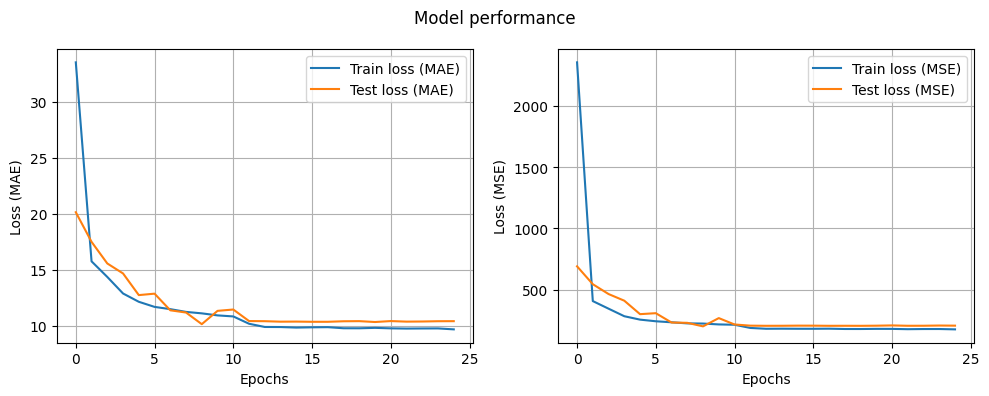

In [151]:
plot_model_performance(bi_lstm_history)

In [154]:
loaded_bi_lstm_model = tf.keras.models.load_model("./saved_models/bi_lstm_new.keras")

- Get prediction and model performance

In [155]:
bi_lstm_pred = loaded_bi_lstm_model.predict(X_test)
bi_lstm_model_performance = model_performance(y_test, bi_lstm_pred);
bi_lstm_model_performance

4/4 [==============================] - 1s 12ms/step


{'mae': 10.149, 'mse': 199.409, 'rmse': 14.121, 'r2_score': 0.885}

- Update the comparison dataframe

In [156]:
bi_lstm_df = pd.DataFrame({
    "model": ["bi_lstm"],
    "mae": [bi_lstm_model_performance["mae"]],
    "mse": [bi_lstm_model_performance["mse"]],
    "rmse": [bi_lstm_model_performance["rmse"]],
    "r2_score": [bi_lstm_model_performance["r2_score"]]
})

bi_lstm_df.set_index("model", inplace=True)
comparison_df = pd.read_csv("./comparison_df_new.csv", index_col="model")
comparison_df = pd.concat([comparison_df, bi_lstm_df])
comparison_df

,mae,mse,rmse,r2_score
model,,,,
lstm,10.678,202.804,14.241,0.883
cnn,11.334,230.779,15.191,0.866
cnn_2d,11.276,233.779,15.290,0.865
bi_lstm,10.149,199.409,14.121,0.885


- Save the `.csv` file

In [157]:
comparison_df.to_csv("./comparison_df_new.csv")

### 6. TCN

In [187]:
inputs = layers.Input(shape = (30, 12))
x = layers.Conv1D(filters = 64, padding = "causal", kernel_size = 7, dilation_rate = 1, activation = "relu")(inputs)
x = layers.Conv1D(filters = 128, padding = "causal", kernel_size = 7, dilation_rate = 2, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(units = 128, activation = "relu")(x)
outputs = layers.Dense(units = 1, activation = "relu")(x)

In [188]:
tcn_model = Model(inputs, outputs)

In [190]:
tcn_model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
    metrics = ["mae", "mse"]
)

In [191]:
tcn_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 30, 12)]          0         
                                                                 
 conv1d_10 (Conv1D)          (None, 30, 64)            5440      
                                                                 
 conv1d_11 (Conv1D)          (None, 30, 128)           57472     
                                                                 
 flatten_6 (Flatten)         (None, 3840)              0         
                                                                 
 dense_45 (Dense)            (None, 128)               491648    
                                                                 
 dense_46 (Dense)            (None, 1)                 129       
                                                                 
Total params: 554689 (2.12 MB)
Trainable params: 554689 (2

In [192]:
tcn_history = tcn_model.fit(x = feature, y = label, validation_data = (X_test, y_test), batch_size = 32, epochs = 30, callbacks = [model_ckpt("tcn_new_2"), reduce_lr_on_plateau])

Epoch 1/30
543/551 [============================>.] - ETA: 0s - loss: 547.6244 - mae: 17.6588 - mse: 547.6244
Epoch 1: val_loss improved from inf to 265.64807, saving model to ./saved_models\tcn_new_2.keras
551/551 [==============================] - 4s 6ms/step - loss: 542.9731 - mae: 17.5701 - mse: 542.9731 - val_loss: 265.6481 - val_mae: 12.5669 - val_mse: 265.6481 - lr: 0.0020
Epoch 2/30
550/551 [============================>.] - ETA: 0s - loss: 252.9315 - mae: 12.3220 - mse: 252.9315
Epoch 2: val_loss improved from 265.64807 to 259.67545, saving model to ./saved_models\tcn_new_2.keras
551/551 [==============================] - 3s 6ms/step - loss: 252.9184 - mae: 12.3227 - mse: 252.9184 - val_loss: 259.6754 - val_mae: 12.5571 - val_mse: 259.6754 - lr: 0.0020
Epoch 3/30
550/551 [============================>.] - ETA: 0s - loss: 236.1374 - mae: 11.8571 - mse: 236.1374
Epoch 3: val_loss did not improve from 259.67545
551/551 [==============================] - 3s 6ms/step - loss: 236.14

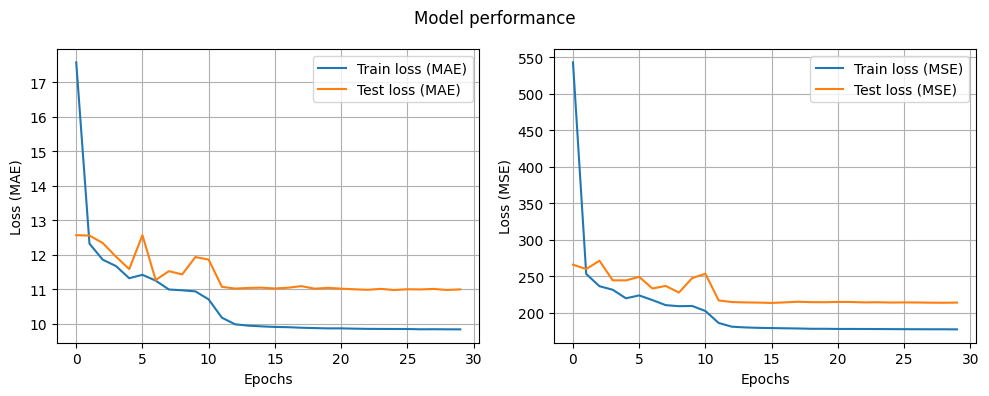

In [193]:
plot_model_performance(tcn_history)

In [194]:
loaded_tcn_model = tf.keras.models.load_model("./saved_models/tcn_new.keras")

In [195]:
tcn_pred = loaded_tcn_model.predict(X_test)
tcn_model_performance = model_performance(y_test, tcn_pred);
tcn_model_performance

4/4 [==============================] - 0s 2ms/step


{'mae': 11.024, 'mse': 213.204, 'rmse': 14.601, 'r2_score': 0.877}

In [197]:
tcn_df = pd.DataFrame({
    "model": ["tcn"],
    "mae": [tcn_model_performance["mae"]],
    "mse": [tcn_model_performance["mse"]],
    "rmse": [tcn_model_performance["rmse"]],
    "r2_score": [tcn_model_performance["r2_score"]]
})

tcn_df.set_index("model", inplace=True)
comparison_df = pd.read_csv("./comparison_df_new.csv", index_col="model")
comparison_df = pd.concat([comparison_df, tcn_df])
comparison_df

,mae,mse,rmse,r2_score
model,,,,
lstm,10.678,202.804,14.241,0.883
cnn,11.334,230.779,15.191,0.866
cnn_2d,11.276,233.779,15.290,0.865
bi_lstm,10.149,199.409,14.121,0.885
tcn,11.024,213.204,14.601,0.877


In [199]:
comparison_df.to_csv("./comparison_df_new.csv")

## Plotting the actual vs predicted RUL by `Bi-LSTM` model

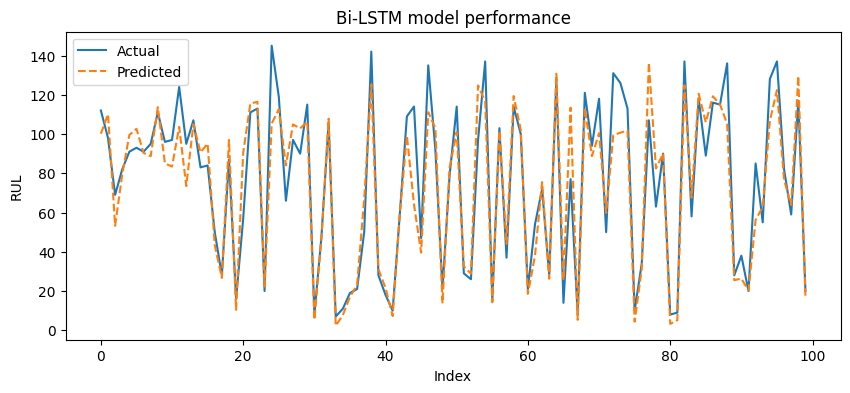

In [200]:
plt.figure(figsize = (10, 4))
sns.lineplot(y_test, label = "Actual")
sns.lineplot(bi_lstm_pred.ravel(), linestyle = "--", label = "Predicted");
plt.xlabel("Index")
plt.ylabel("RUL")
plt.title("Bi-LSTM model performance");

- Actual vs Predicted RUL for train data Engine 1, FD001

9/9 [==============================] - 0s 12ms/step


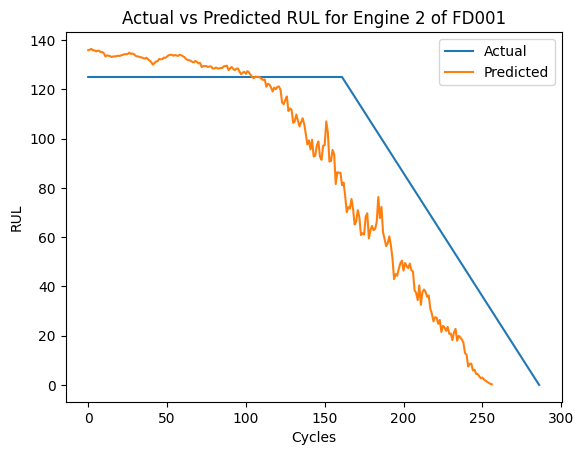

In [237]:
engine_1 = data_grp.get_group(2)
sns.lineplot(engine_1["RUL"].values, label = 'Actual')
engine_1_windowed = get_windowed_data(data = engine_1)
engine_1_data, engine_1_rul = engine_1_windowed

engine_1_rul_pred = loaded_bi_lstm_model.predict(engine_1_data)
sns.lineplot(engine_1_rul_pred.ravel(), label = 'Predicted')
plt.legend()
plt.xlabel("Cycles")
plt.ylabel("RUL")
plt.title("Actual vs Predicted RUL for Engine 2 of FD001");

## Plot model comparison

In [205]:
comparison_df = pd.read_csv("./comparison_df_new.csv", index_col = "model")
comparison_df

,mae,mse,rmse,r2_score
model,,,,
linear_regression,18.249,525.064,22.914,0.696
random_forest,15.628,416.567,20.410,0.759
xgboost,15.049,397.521,19.938,0.770
lightgbm,14.842,381.274,19.526,0.779
catboost,14.759,386.822,19.668,0.776
ann,14.707,386.530,19.660,0.776
lstm,10.678,202.804,14.241,0.883
cnn,11.334,230.779,15.191,0.866
cnn_2d,11.276,233.779,15.290,0.865


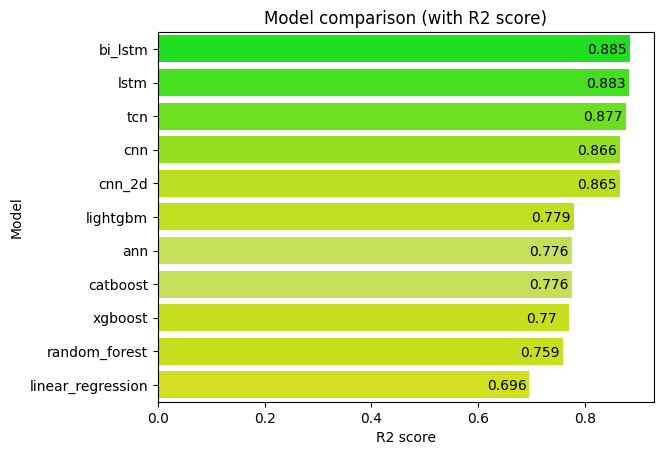

In [206]:
r2_scores = comparison_df.sort_values("rmse")["r2_score"]
model_names = comparison_df.sort_values("rmse").index

color_shade = [
    "#00FF00",  # Bright Green
    "#33FF00",  # Lime Green
    "#66FF00",  # Light Lime Green
    "#99FF00",  # Greenish Yellow
    "#CCFF00",  # Yellowish Green
    "#D4FF00",  # Lighter Yellowish Green
    "#d4f542",
    "#d4f542",
    "#E0FF00",  # Pale Yellowish Green
    "#E0FF00",  # Pale Yellowish Green
    "#EEFF00"   # Near Yellow Green
]

sns.barplot(y = model_names, x = r2_scores, palette=color_shade)

# Plotting the R2 scores
for i, r2 in enumerate(r2_scores):
    plt.text(r2-0.08, i+0.15, f"{r2}")

plt.ylabel("Model")
plt.xlabel("R2 score")
plt.title("Model comparison (with R2 score)");

## **Future Work**

- **We have seen that the the sensor data is too noisy!**

- For example, let's visualize the sensor2 data of engine_1

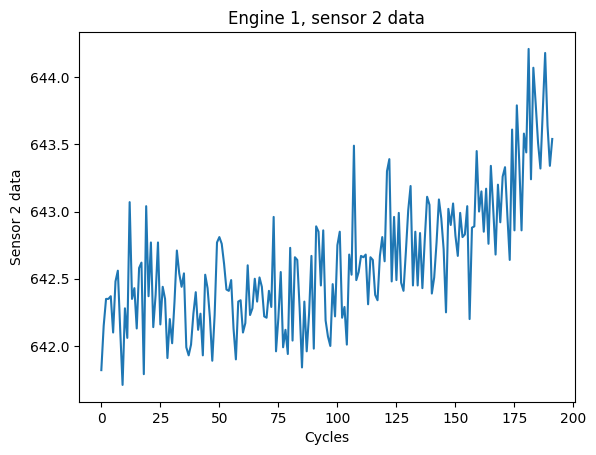

In [43]:
engine_1 = data_grp.get_group(1)
sns.lineplot(engine_1["sensor2"])
plt.xlabel("Cycles")
plt.ylabel("Sensor 2 data")
plt.title("Engine 1, sensor 2 data");

- **💡It will be better for our ML/DL models, if we apply some kind of smoothing, to reduce noisiness of the data!**

- Let's apply Exponential Weighted Moving Average (EMW) or (EMWA)!

<img src="https://miro.medium.com/v2/resize:fit:936/1*T_LIOrrndIGOf1gOMd3Igw.png">

- In this formula, 
    - `x(t)` represents the value at time `t`.
    - `y(t)` represents the smoothed value at time `t`.
    - `alpha` is the smoothing factor.

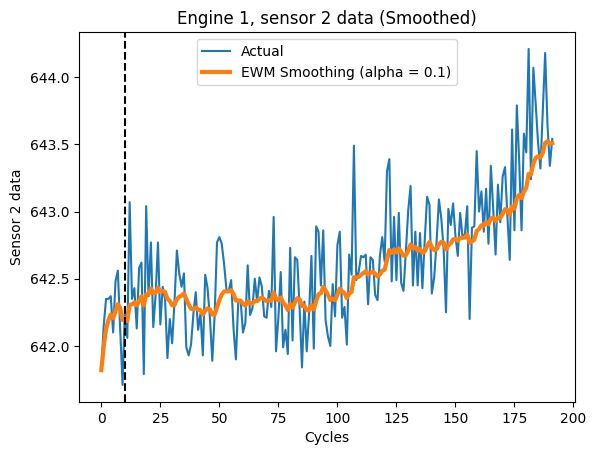

In [52]:
smoothed_sensor2 = engine_1["sensor2"].ewm(alpha = 0.1).mean()
sns.lineplot(engine_1["sensor2"], label = "Actual")
sns.lineplot(smoothed_sensor2, lw = 3, label = "EWM Smoothing (alpha = 0.1)")
plt.axvline(x = 10, linestyle = "--", color = 'black')
plt.legend(loc = 'upper center')
plt.xlabel("Cycles")
plt.ylabel("Sensor 2 data")
plt.title("Engine 1, sensor 2 data (Smoothed)");

- See, how much the data is stable now!
- But, for first 10 cycles, the smoothed data is kind of warming up, we can remove this part in the future work!
- So for each engine, better to remove the first 10 values after smoothing.
- Thus, `WINDOW_SIZE` will also be reduced to `20`, (`30 - 10 = 20`), as for the test data, we also have to do the same!

In [63]:
smoothed_sensor2.iloc[:10] = np.nan

- After removing the first `10` values.

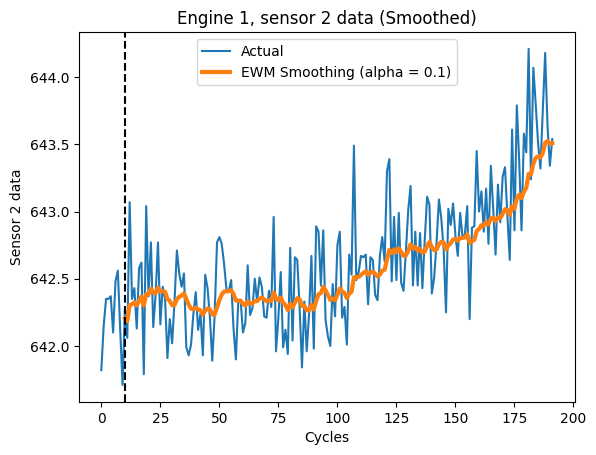

In [64]:
# smoothed_sensor2
sns.lineplot(engine_1["sensor2"], label = "Actual")
sns.lineplot(smoothed_sensor2, lw = 3, label = "EWM Smoothing (alpha = 0.1)")
plt.axvline(x = 10, linestyle = "--", color = 'black')
plt.legend(loc = 'upper center')
plt.xlabel("Cycles")
plt.ylabel("Sensor 2 data")
plt.title("Engine 1, sensor 2 data (Smoothed)");

- Potential function to apply the smoothing for the data.

In [138]:
def smooth_data(data_grp):
    '''
    Takes a group by object, grouped based on Engine No., and returns the smoothed df.
    '''
    final_df = pd.DataFrame(columns = data.columns)    # In this df, we will concat all the temporary df
    for _, df in tqdm(data_grp):    # Iterate over all engine groups
        for col in df.columns:      # For each columns
            if("sensor" in col):    # If the column is corresponding to some sensor
                smoothed_series = df.loc[:, col].ewm(alpha = 0.1).mean()   # Apply EWM smoothing
                smoothed_series.iloc[:10] = np.nan   # Set the first 10 values as NaN
                df.loc[:, col] = smoothed_series     # Finally set the smoothed values in the df
        final_df = pd.concat([final_df, df])     # Concat the resultant df after all smoothing is applied, per engine group
    return final_df
            

In [139]:
smoothed_df = smooth_data(data_grp)

  0%|          | 0/100 [00:00<?, ?it/s]

- Now, you can apply df.dropna(), to remove all the top 10 rows, having NaN values

In [140]:
engine_2 = data_grp.get_group(2)
smoothed_engine_2 = smoothed_df[(smoothed_df["engine"] == 2)]

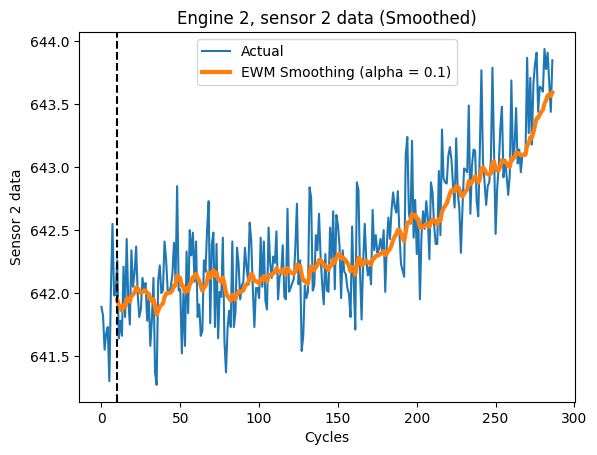

In [141]:
sns.lineplot(x = np.arange(engine_2.shape[0]), y = engine_2["sensor2"], label = "Actual")
sns.lineplot(x = np.arange(engine_2.shape[0]), y = smoothed_engine_2["sensor2"], lw = 3, label = "EWM Smoothing (alpha = 0.1)")
plt.axvline(x = 10, linestyle = "--", color = 'black')
plt.legend(loc = 'upper center')
plt.xlabel("Cycles")
plt.ylabel("Sensor 2 data")
plt.title("Engine 2, sensor 2 data (Smoothed)");

### **Now, as the idea is set, let's see if this approach actually improves the result or not, in the near future 🔮!**